## Sod's Shock Tube Problem - Richtmyer Method

### Import Libraries

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
#
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

### Parameters

In [2]:
nx = 81
dx = 0.25
#
x_left = -10
x_right = 10
#
x = numpy.linspace(x_left,x_right,nx)
#
dt = .0002 
T_terminal = .01 #seconds
#
nt = int(T_terminal/dt)
#
gamma = 1.4

In [3]:
print(nt)

50


### Initial Conditions

In [4]:
#left side:
rho_init_left = 1. #kg/m3
vel_init_left = 0. #m/s
P_init_left = 100000. #N/m2
#right side:
rho_init_right = 0.125 #kg/m3
vel_init_right = 0. #m/s
P_init_right = 10000. #N/m2

### Define Intitial Conditios and Flux Function

In [5]:
def get_U_initial(numx):
    u = numpy.zeros((3,numx),dtype=float)
    """
    Parameters:
    -----------
    numx - number of nodes
    """
    for i in range(numx):
        if (x[i] < 0):
            u[0,i] = rho_init_left
            u[1,i] = vel_init_left*rho_init_left
            u[2,i] = P_init_left/(gamma-1.)
        else:
            u[0,i] = rho_init_right
            u[1,i] = vel_init_right*rho_init_right
            u[2,i] = P_init_right/(gamma-1.)
    #
    return u

In [6]:
def get_Flux(Uv):
    """
    Parameters:
    -----------
    Uv - U vector of mass, momentum, and pressure
    """
    Fs= numpy.zeros_like(Uv)
    #
    Fs[0,:] = Uv[1,:]
    #
    Fs[1,:] = ((Uv[1,:]**2)/Uv[0,:]) + (gamma-1)*(Uv[2,:] - 0.5*(Uv[1,:]**2)/Uv[0,:])
    #
    Fs[2,:] = (Uv[2,:] + (gamma-1)*(Uv[2,:] - 0.5*(Uv[1,:]**2)/Uv[0,:]))*(Uv[1,:]/Uv[0,:])
    #
    return Fs

## Solve

In [7]:
def Richtmyer(U_init, numt, delt, delx, numx):
    """
    Parameters:
    -----------
    U_init - initial values of mass, momentum, and pressure
    numt - number of time steps
    delt - time step size
    delx - uniform node spacing
    numx - number of nodes
    
    Note that this code does not worry about boundary conditions since we don't let the shock and expansion waves
    reach the boundaries
    """
    Un = numpy.zeros((numt+1,3,numx))
    Un[:,:,:] = U_init[:,:]
    #
    Ustar = numpy.zeros((3,numx))
    Ustar[:,:] = U_init[:,:]
    #
    U = numpy.zeros((3,numx))
    U[:,:] = U_init[:,:]
    #
    for t in range(1,numt+1):
        #predictor step
        Fstar = get_Flux(U) 
        Ustar[:,:-1] = 0.5*(U[:,1:] + U[:,:-1]) - (delt/(2*delx))*(Fstar[:,1:] - Fstar[:,:-1]) 
        #Corrector Step
        F = get_Flux(Ustar) 
        Un[t,:,1:-1] = U[:,1:-1] - (delt/delx)*(F[:,1:-1] - F[:,:-2])
        U = Un[t,:,:].copy()
        #
    return Un[:,:,:]     

In [8]:
U_initial = get_U_initial(nx)

In [9]:
UN = Richtmyer(U_initial, nt, dt, dx, nx)

### Post Processing

In [10]:
def animate(UN):
    x = numpy.linspace(x_left,x_right,nx)
    y = UN[0,:]
    line.set_data(x,y)
    return line,


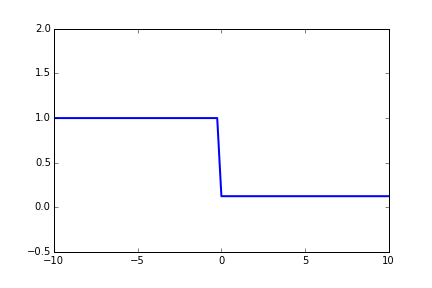
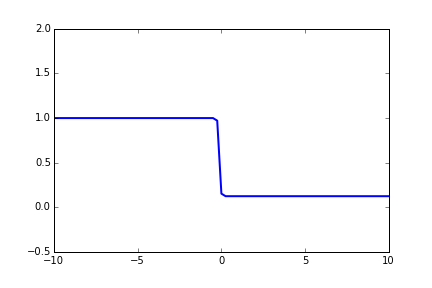
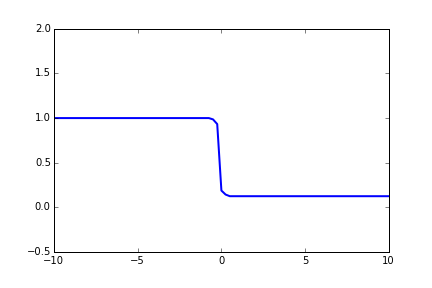
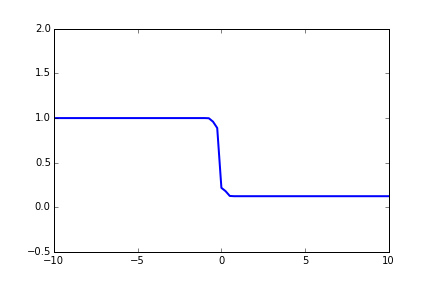
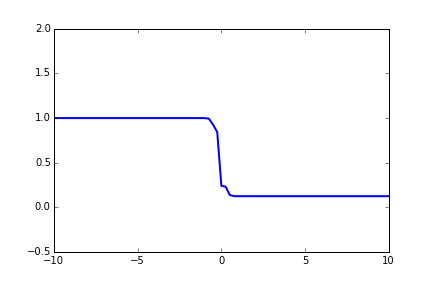
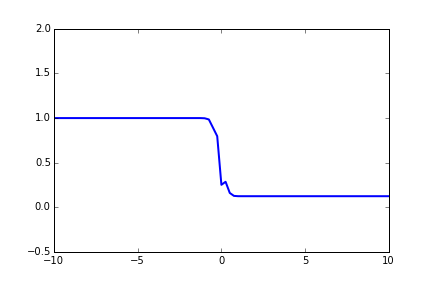
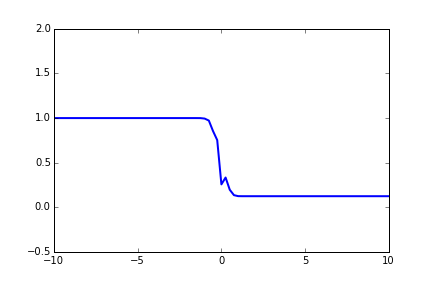
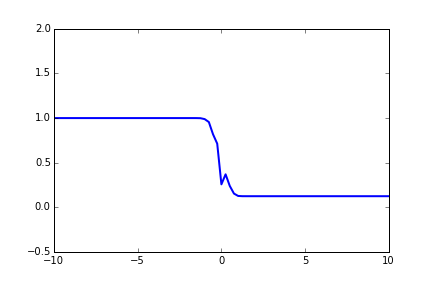
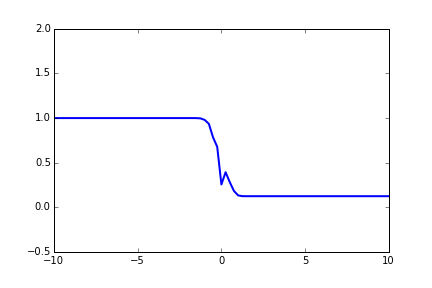
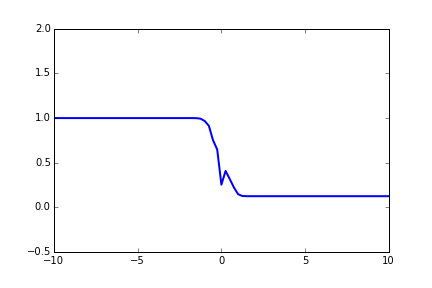
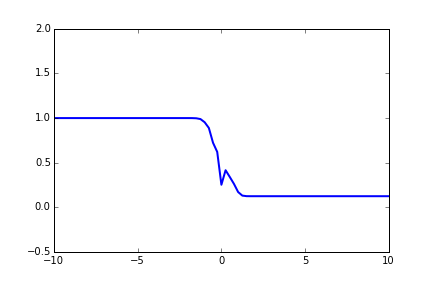
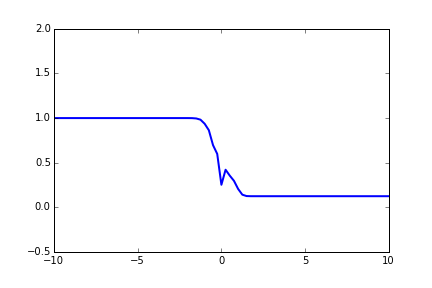
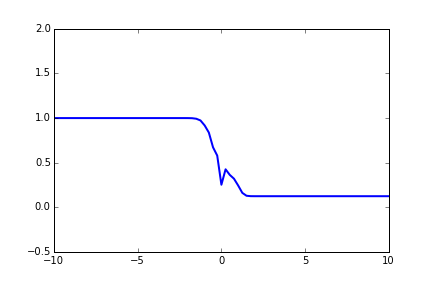
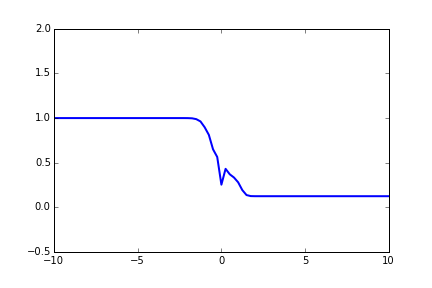
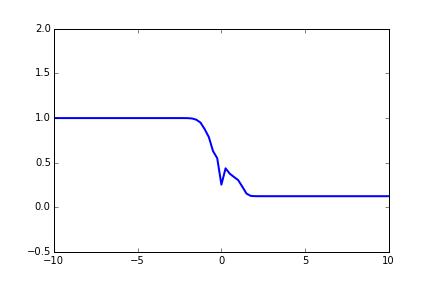
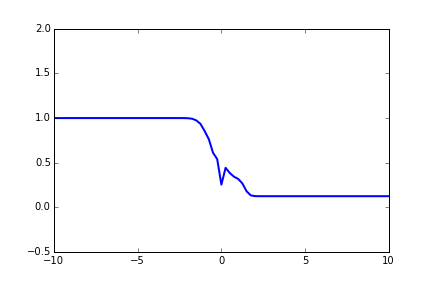
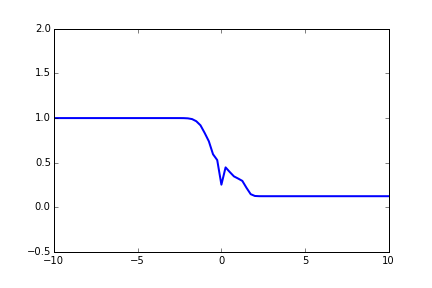
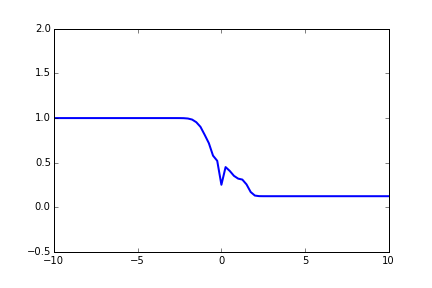
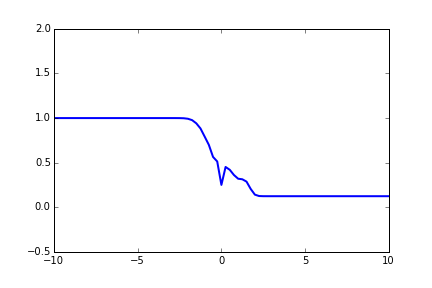
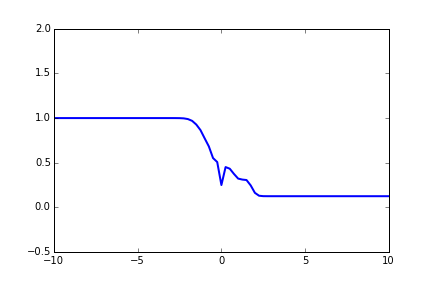
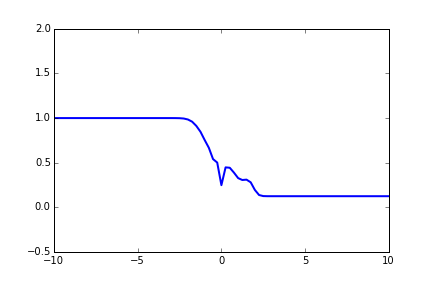
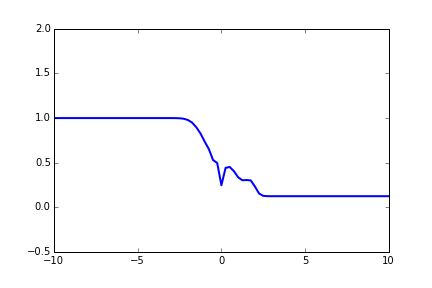
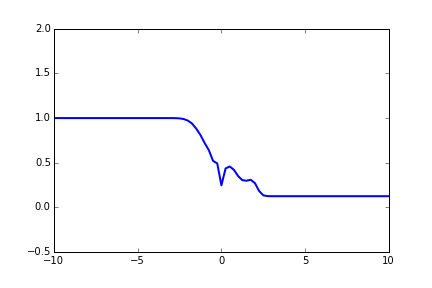
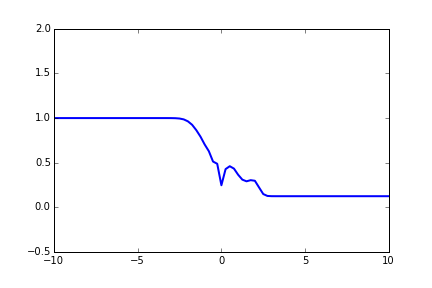
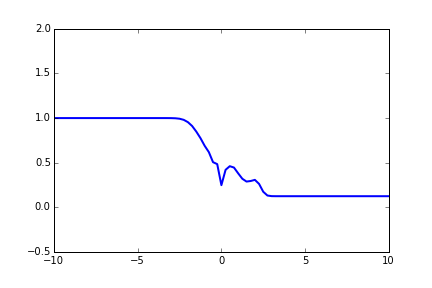
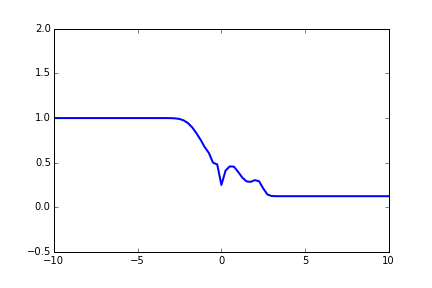
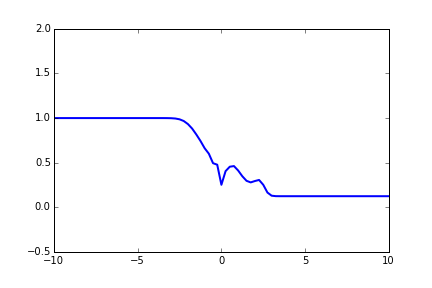
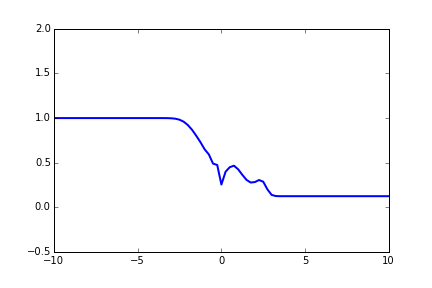
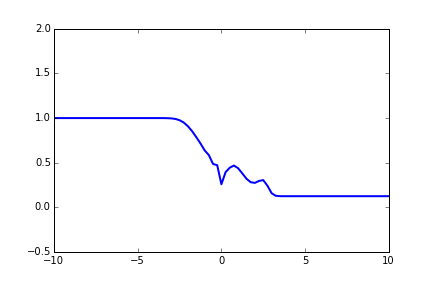
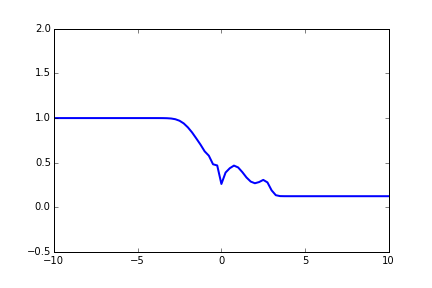
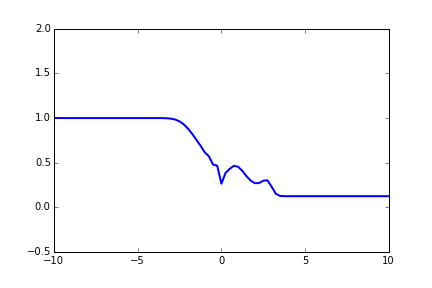
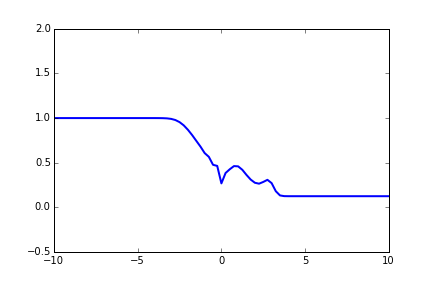
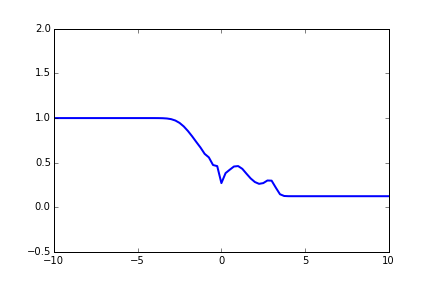
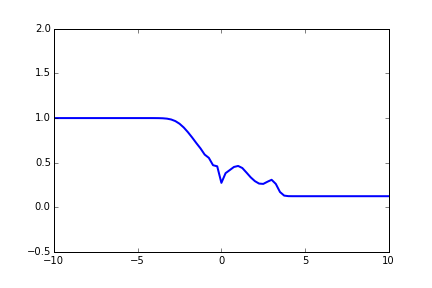
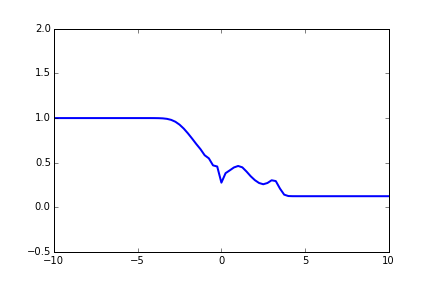
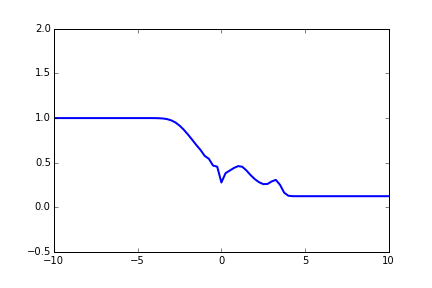
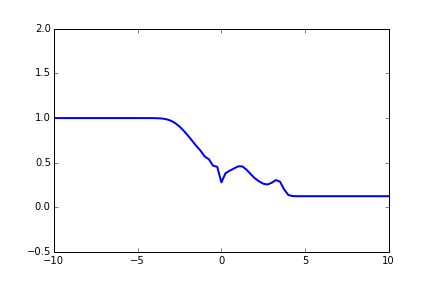
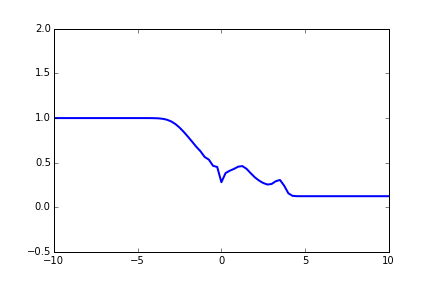
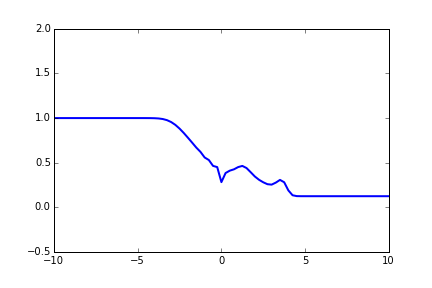
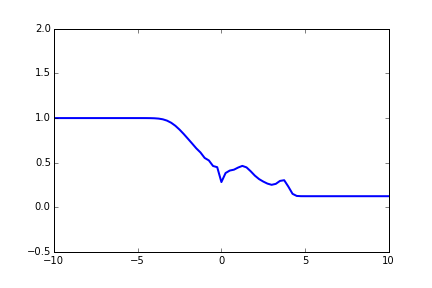
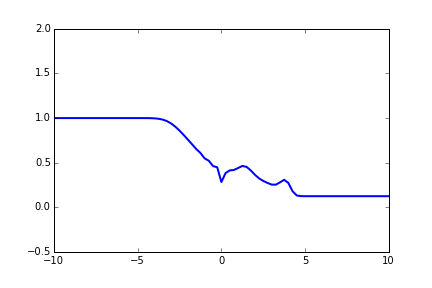
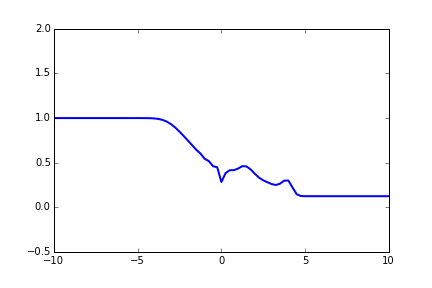
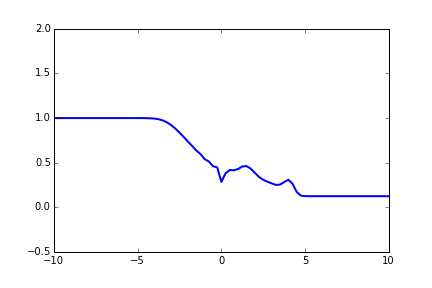
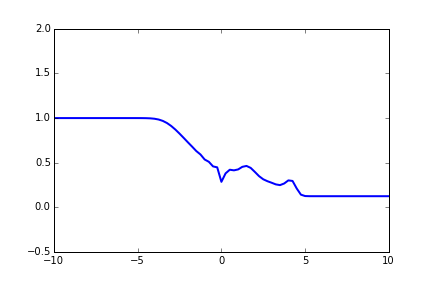
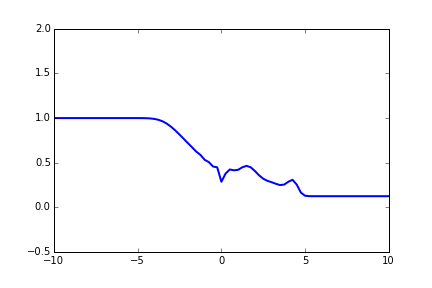
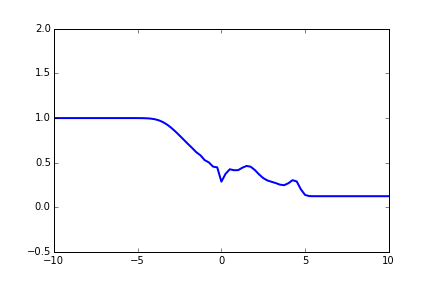
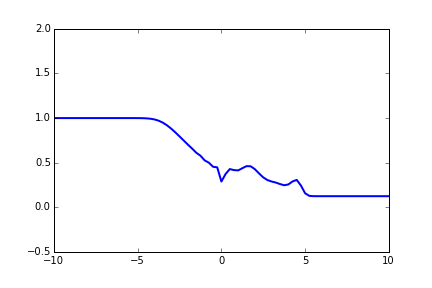
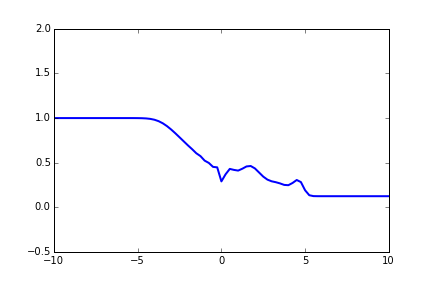
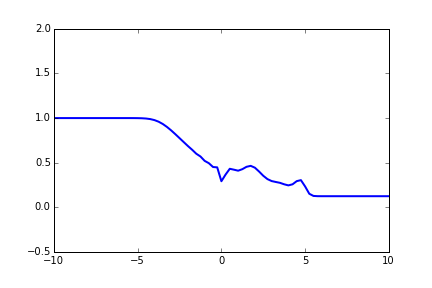
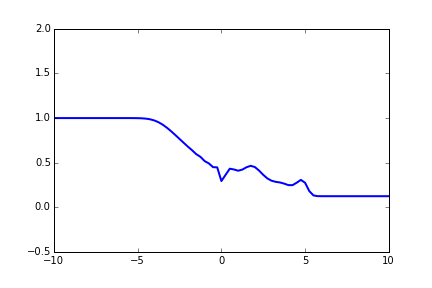
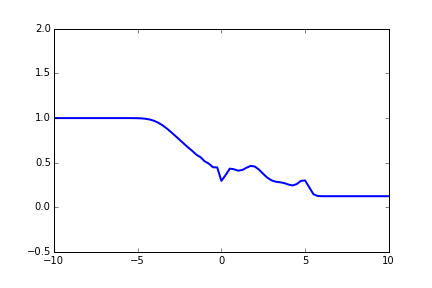

In [11]:
#density profile
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=UN, interval=50)
display_animation(anim, default_mode='once')

### Plots at nt=50

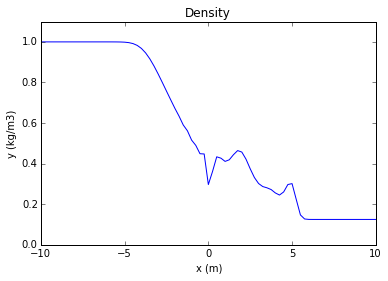

In [12]:
pyplot.plot(x,UN[50,0,:])
pyplot.title('Density')
pyplot.xlabel('x (m)')
pyplot.ylabel('y (kg/m3)')
pyplot.ylim(0,1.1);

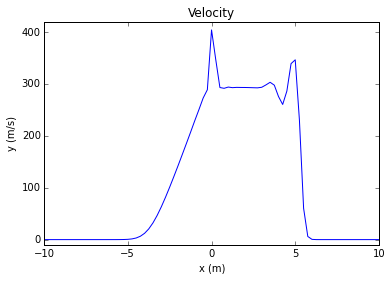

In [13]:
pyplot.plot(x,UN[50,1,:]/UN[50,0,:])
pyplot.title('Velocity')
pyplot.xlabel('x (m)')
pyplot.ylabel('y (m/s)')
pyplot.ylim(-10,420);

In [14]:
P = (gamma-1)*(UN[50,2,:] - 0.5*(UN[50,1,:]**2)/UN[50,0,:])

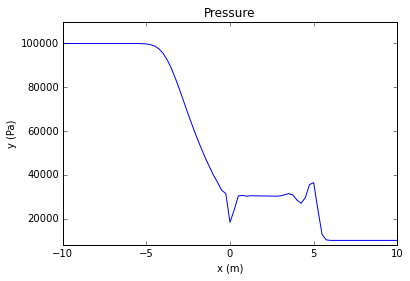

In [15]:
pyplot.plot(x,P)
pyplot.title('Pressure')
pyplot.xlabel('x (m)')
pyplot.ylabel('y (Pa)')
pyplot.ylim(8000,110000);

### Assignment Questions

In [16]:
numpy.where(x==2.5)

(array([50]),)

In [17]:
velocity = UN[nt,1,50]/UN[nt,0,50]

In [18]:
print(numpy.round(velocity,2))

292.61


In [19]:
pressure = (gamma-1)*(UN[nt,2,50] - 0.5*(UN[nt,1,50]**2)/UN[nt,0,50])

In [20]:
print(numpy.round(pressure,2))

30250.89


In [21]:
density = UN[nt,0,50]

In [22]:
print(numpy.round(density,2))

0.37
